# Tarea 10. k-vecinos más cercanos.
L.E. Rojón

138442

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Vamos a comparar una máquina de soporte vectorial y una red neuronal con  el algoritmo de los k-vecinos más cercanos.

Primero, generamos los datos.

In [2]:
npuntos = 100
centros = np.array([[0,0],[5,5],[10,10]])
var = np.array([1,1,1])
n = centros.shape[0]
X = np.zeros((n,npuntos,2))
Y = np.zeros((n,npuntos,1))
for i in range(0, n):
    X[i] = np.random.normal(centros[i,0], var[i], [npuntos,2])
    Y[i] = 1.0*np.array((X[i,:,0]-centros[i,0])**2 + (X[i,:,1]-centros[i,1])**2 < var[i]**2).reshape(npuntos,1)
    
xaux = X.reshape(n*npuntos,2)
yaux = Y.reshape(n*npuntos,1)

Primero, la máquina de soporte vectoria.

In [5]:
clfS = SVC(C=1.0, kernel="rbf")
clfS.fit(xaux,yaux.ravel())
y_predS = clfS.predict(xaux)
accSVM = accuracy_score(yaux, y_predS)
print("Precision:",accSVM)

('Precision:', 0.96999999999999997)


Ahora, la red neuronal.

In [6]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1)
clf.fit(xaux,yaux.ravel())
y_predNN = clf.predict(xaux)
accNN = accuracy_score(yaux, y_predNN)
print("Presicion:",accNN)

('Presicion:', 0.82666666666666666)


Luego, los k-vecinos más ceranos

In [8]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(xaux,yaux.ravel()) 
y_predKNN = neigh.predict(xaux)
accKNN = accuracy_score(yaux, y_predKNN)
print("Presicion:",accKNN)

('Presicion:', 0.97333333333333338)


De aquí, es fácil ver que el algorítmo de los k-vecinos más cercanos es el más preciso, mientras que la red neuronal es el algoritmo con peor desempeño. Ahora, a continuación se presenta una visualización gráfica de este hecho que ayuda con el análisis.

Primero, una función para obtener las clases de los datos.

In [10]:
def getClasses(y,yp,n):
    res = np.zeros((n,3))
    for i in range(0,n):
        res[i] = [0, 255, 0] if (y[i]==yp[i]) else [255, 0, 0]
    return res


Ahora,  la gráfica de los datos originales

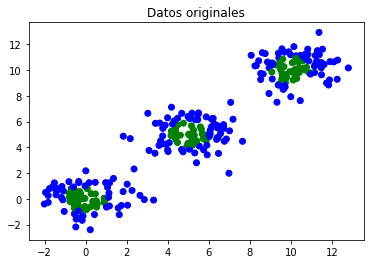

In [14]:
cad = "Datos originales"
plt.title(cad)
YW = yaux
plt.scatter(xaux[:,0],xaux[:,1],c=['green' if i==1 else 'blue' for i in YW])
plt.show()

Primero, la red neuronal.

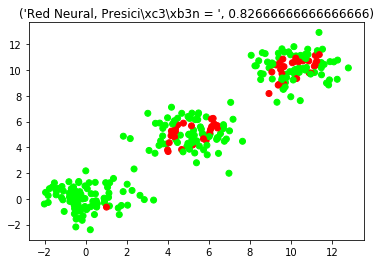

In [21]:
cad = "Red Neural, Presición = ",accNN
plt.title(cad)
YW = getClasses(yaux,y_predNN,3*npuntos)
plt.scatter(xaux[:,0],xaux[:,1],c=YW/255.0)
plt.show()

Luego, la máquina de soporte vectorial.

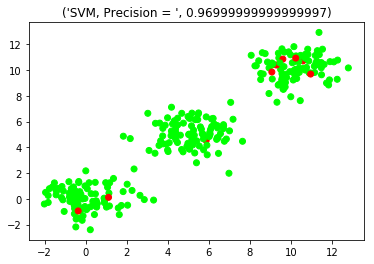

In [20]:
cad = "SVM, Precision = ",accSVM
plt.title(cad)
YW = getClasses(yaux,y_predS,3*npuntos)
plt.scatter(xaux[:,0],xaux[:,1],c=YW/255.0)
plt.show()

Finalmente, los k-vecinos.

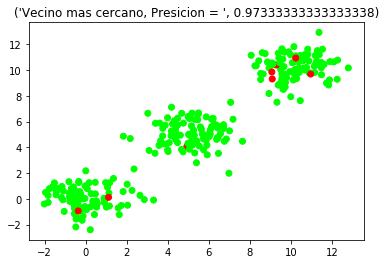

In [19]:
cad = "Vecino mas cercano, Presicion = ",accKNN
plt.title(cad)
YW = getClasses(yaux,y_predKNN,3*npuntos)
plt.scatter(xaux[:,0],xaux[:,1],c=YW/255.0)
plt.show()

De donde los puntos verdes son los clasificados correctamente y los rojos son clasificaciones incorrectas.